In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
adelaide_data = pd.read_csv('Adelaide_Data.csv', header=None)
perth_data = pd.read_csv('Perth_Data.csv', header=None)
sydney_data = pd.read_csv('Sydney_Data.csv', header=None)
tasmania_data = pd.read_csv('Tasmania_Data.csv', header=None)

In [4]:
adelaide_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


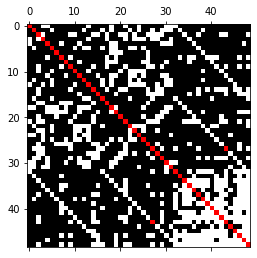

In [5]:
corr_mat = adelaide_data.corr()
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['k', 'w','r'])
plt.matshow(corr_mat, cmap=cmap)
plt.show()

In [6]:
adelaide_data[48][0] - sum(adelaide_data[i][0] for i in range(32, 48))

0.0001000002957880497

In [7]:
col = [i for i in range(32, 48)]
adelaide_data_dropped = adelaide_data.drop(columns=col)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(adelaide_data_dropped.loc[:,:31], adelaide_data_dropped.loc[:,48], test_size=0.20, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 

In [25]:
model = LinearRegression() 
model.fit(X_train, y_train)


LinearRegression()

In [26]:
model.predict(X_test)

array([1369479.01019569, 1394425.06128514, 1373836.8435784 , ...,
       1398519.23688838, 1438977.25281194, 1414340.3063915 ])

In [34]:

print(mean_squared_error(y_test, model.predict(X_test)))
print(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

# y_pred = model.predict(X_test)
# print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

2612461205.179092
50617.531871197614


In [32]:
X = adelaide_data_dropped.loc[:,:31]

<AxesSubplot:>

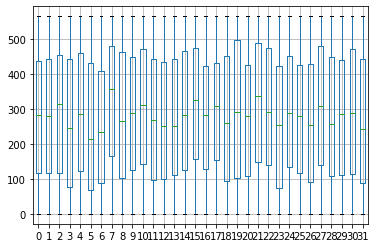

In [33]:
X.boxplot()